In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
df=pd.read_csv("Boston.csv")

In [5]:
df.keys()

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

#Step 1: Basic Data Inspection

In [6]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
df.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [9]:
df.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [10]:
df.shape

(506, 15)

In [11]:
print(df.isnull().sum())

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64


#Step 2: Correlation Analysis
We want to understand the relationships between the features and the target variable (medv), which represents the house prices.

In [12]:
df.corr()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
crim,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626


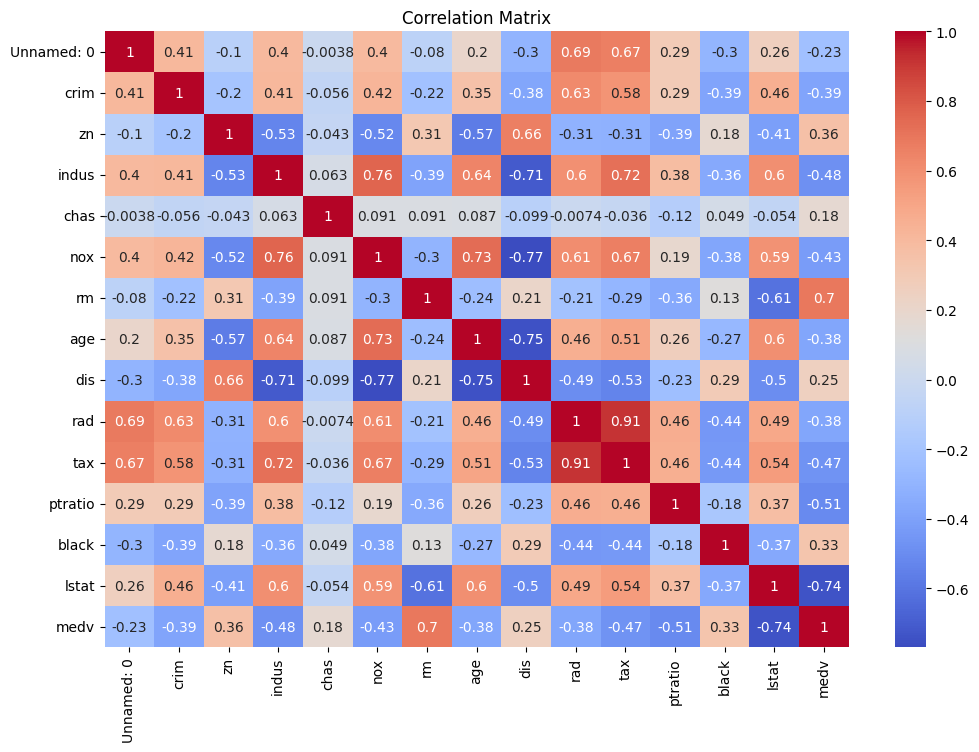

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [14]:
pip install --upgrade seaborn


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: seaborn in c:\users\kittu\anaconda3\lib\site-packages (0.13.2)




[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#Step 3: Univariate Analysis
We can examine the distribution of individual features to understand the data better.

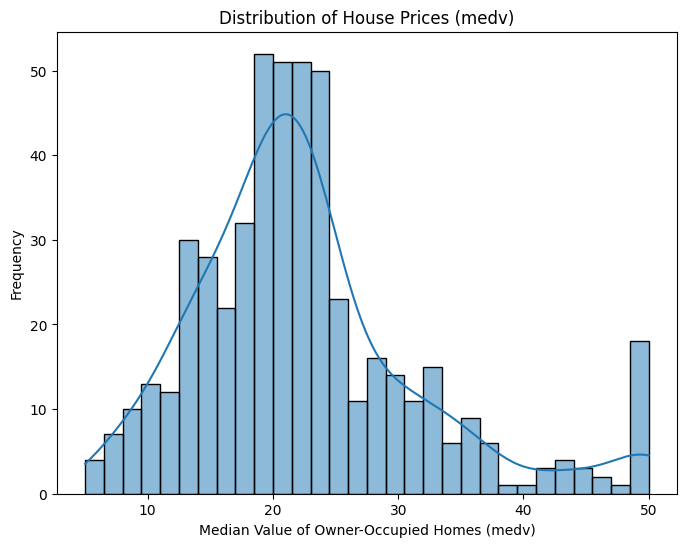

In [15]:
# Distribution of the target variable (medv)


plt.figure(figsize=(8, 6))
sns.histplot(df['medv'], bins=30, kde=True)
plt.title('Distribution of House Prices (medv)')
plt.xlabel('Median Value of Owner-Occupied Homes (medv)')
plt.ylabel('Frequency')
plt.show()


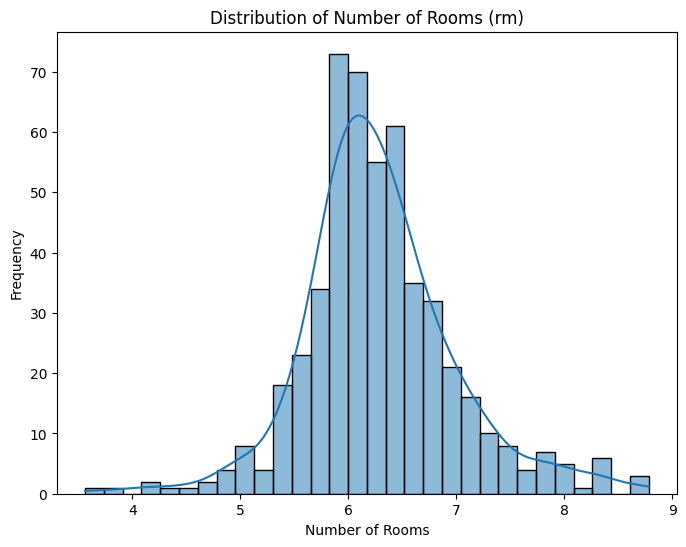

In [16]:
# Distribution of the number of rooms (rm)
plt.figure(figsize=(8, 6))
sns.histplot(df['rm'], bins=30, kde=True)
plt.title('Distribution of Number of Rooms (rm)')
plt.xlabel('Number of Rooms')
plt.ylabel('Frequency')
plt.show()


Bivariate Analysis
Now, let's explore how the features relate to the target variable medv using scatter plots.

Example: Relationship between rm (average number of rooms) and medv

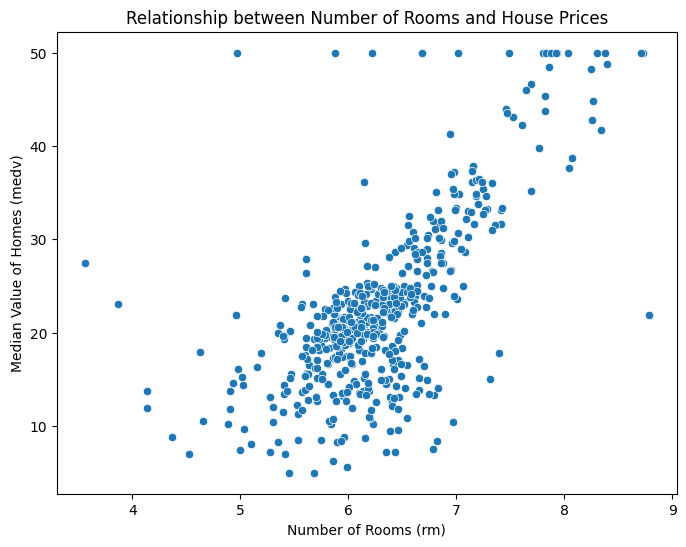

In [17]:
# Scatter plot for rm vs medv
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rm', y='medv', data=df)
plt.title('Relationship between Number of Rooms and House Prices')
plt.xlabel('Number of Rooms (rm)')
plt.ylabel('Median Value of Homes (medv)')
plt.show()


 Relationship between lstat (lower status population) and medv

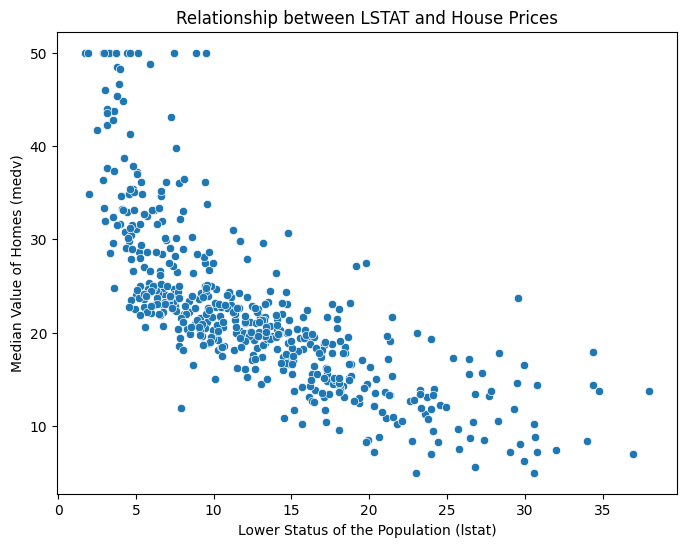

In [18]:
# Scatter plot for lstat vs medv
plt.figure(figsize=(8, 6))
sns.scatterplot(x='lstat', y='medv', data=df)
plt.title('Relationship between LSTAT and House Prices')
plt.xlabel('Lower Status of the Population (lstat)')
plt.ylabel('Median Value of Homes (medv)')
plt.show()


Checking for Outliers
We can use boxplots to detect outliers in the dataset. Let's take a look at rm, lstat, and medv for potential outliers.

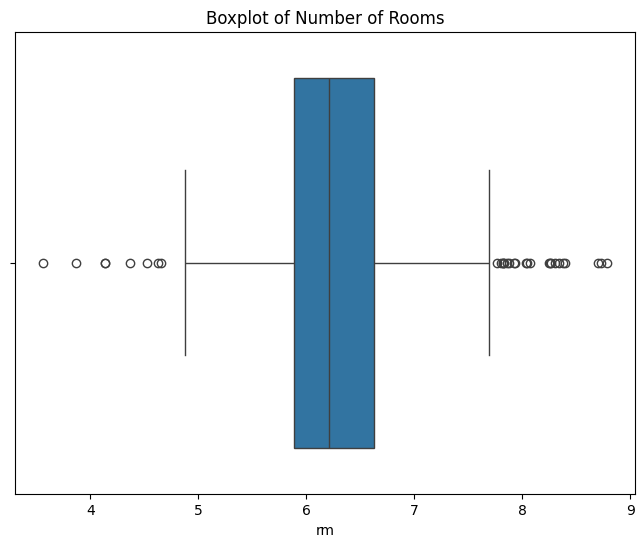

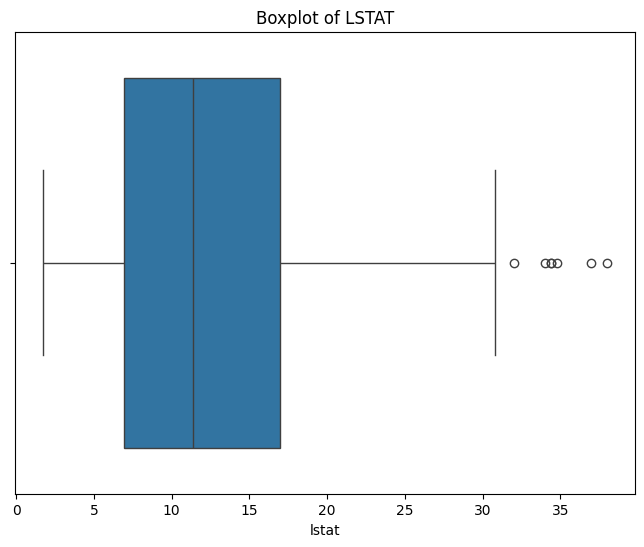

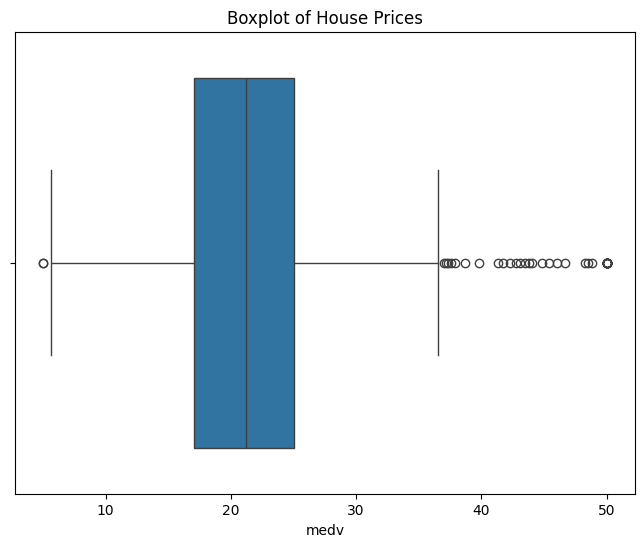

In [19]:
# Boxplot for 'rm' (Number of rooms)
plt.figure(figsize=(8, 6))
sns.boxplot(x='rm', data=df)
plt.title('Boxplot of Number of Rooms')
plt.show()

# Boxplot for 'lstat' (Lower status of population)
plt.figure(figsize=(8, 6))
sns.boxplot(x='lstat', data=df)
plt.title('Boxplot of LSTAT')
plt.show()

# Boxplot for 'medv' (House prices)
plt.figure(figsize=(8, 6))
sns.boxplot(x='medv', data=df)
plt.title('Boxplot of House Prices')
plt.show()


In [20]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['rm'].quantile(0.25)
Q3 = df['rm'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to remove outliers
df_no_outliers = df[(df['rm'] >= lower_bound) & (df['rm'] <= upper_bound)]

# IQR for lstat
Q1_lstat = df['lstat'].quantile(0.25)
Q3_lstat = df['lstat'].quantile(0.75)
IQR_lstat = Q3_lstat - Q1_lstat

# Bounds for lstat outliers
lower_bound_lstat = Q1_lstat - 1.5 * IQR_lstat
upper_bound_lstat = Q3_lstat + 1.5 * IQR_lstat

# IQR for medv
Q1_medv = df['medv'].quantile(0.25)
Q3_medv = df['medv'].quantile(0.75)
IQR_medv = Q3_medv - Q1_medv

# Bounds for medv outliers
lower_bound_medv = Q1_medv - 1.5 * IQR_medv
upper_bound_medv = Q3_medv + 1.5 * IQR_medv

# Filter the dataset to remove outliers for both columns
df_no_outliers = df[(df['lstat'] >= lower_bound_lstat) & (df['lstat'] <= upper_bound_lstat) &
                    (df['medv'] >= lower_bound_medv) & (df['medv'] <= upper_bound_medv) &
                     (df['rm'] >= lower_bound) & (df['rm'] <= upper_bound)]


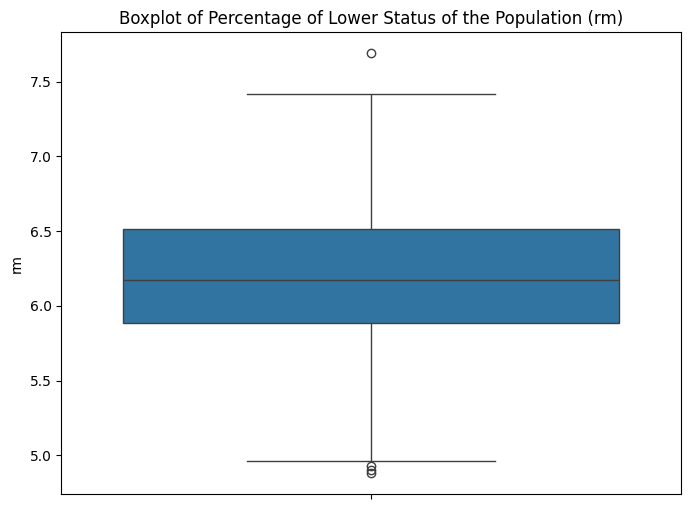

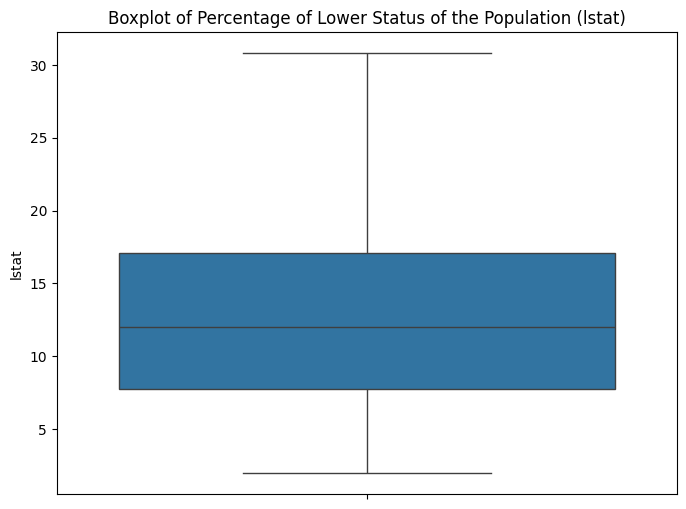

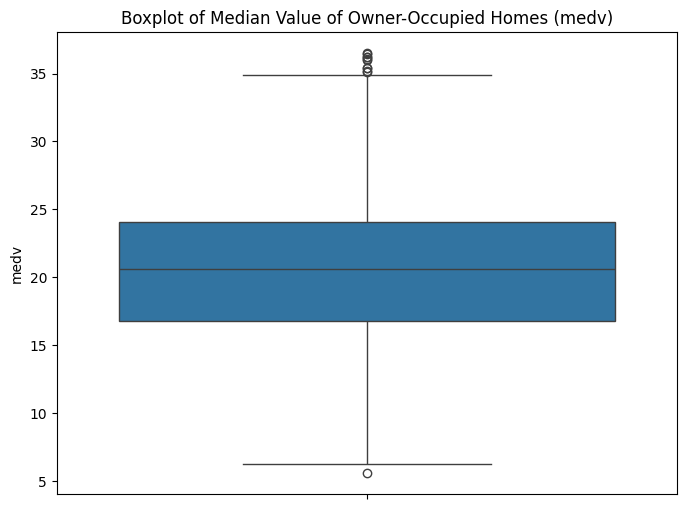

In [21]:
# Boxplot for lstat
plt.figure(figsize=(8, 6))
sns.boxplot(df_no_outliers['rm'])
plt.title('Boxplot of Percentage of Lower Status of the Population (rm)')
plt.show()

# Boxplot for lstat
plt.figure(figsize=(8, 6))
sns.boxplot(df_no_outliers['lstat'])
plt.title('Boxplot of Percentage of Lower Status of the Population (lstat)')
plt.show()

# Boxplot for medv
plt.figure(figsize=(8, 6))
sns.boxplot(df_no_outliers['medv'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (medv)')
plt.show()


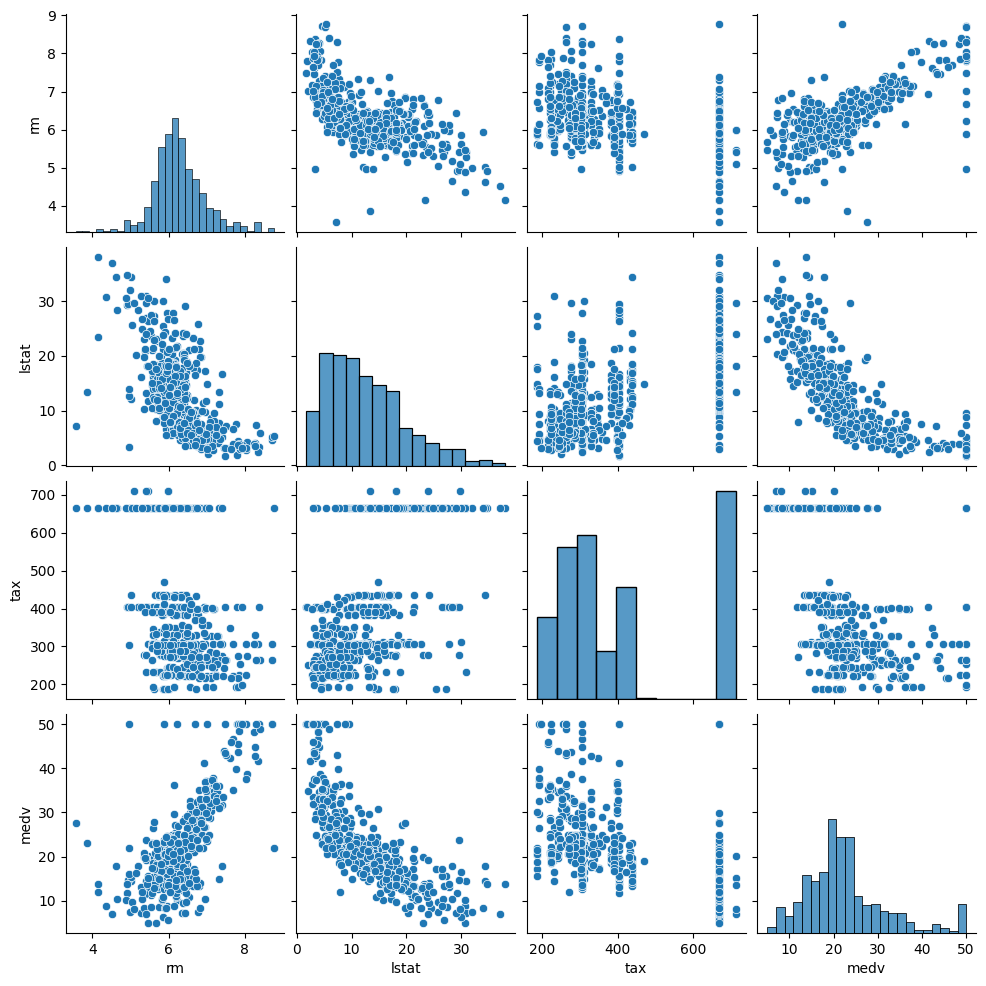

In [22]:
# Pair plot for selected features
sns.pairplot(df[['rm', 'lstat', 'tax', 'medv']])
plt.show()


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [24]:
# Example (if there are categorical variables):
df = pd.get_dummies(df, drop_first=True)


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [26]:

# Define features and target variable
X = df_no_outliers.drop('medv', axis=1)
y = df_no_outliers['medv']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<Axes: xlabel='lstat', ylabel='medv'>

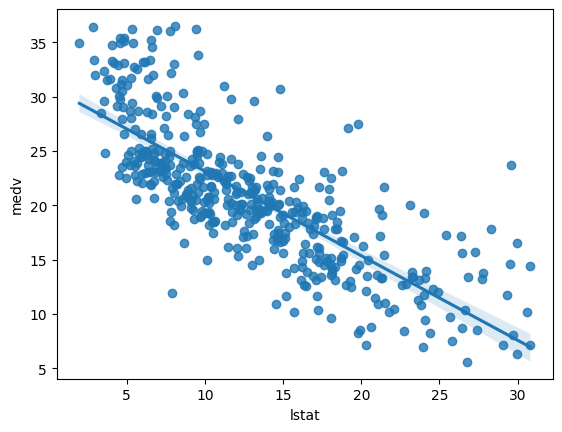

In [27]:
sns.regplot(x="lstat",y="medv",data=df_no_outliers)


In [28]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Linear Regression - MAE: {mae_linear}, R-squared: {r2_linear}')


Linear Regression - MAE: 1.8897288914135908, R-squared: 0.8342710438953856


In [29]:
# Decision Tree Regressor
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f'Decision Tree Regressor - MAE: {mae_tree}, R-squared: {r2_tree}')


Decision Tree Regressor - MAE: 2.403296703296703, R-squared: 0.726277563633624


In [30]:
# Random Forest Regressor
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

mae_forest = mean_absolute_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f'Random Forest Regressor - MAE: {mae_forest}, R-squared: {r2_forest}')


Random Forest Regressor - MAE: 1.709329670329671, R-squared: 0.8689909844254684


In [31]:
# Gradient Boosting Regressor
boosting_model = GradientBoostingRegressor()
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)

mae_boosting = mean_absolute_error(y_test, y_pred_boosting)
r2_boosting = r2_score(y_test, y_pred_boosting)

print(f'Gradient Boosting Regressor - MAE: {mae_boosting}, R-squared: {r2_boosting}')


Gradient Boosting Regressor - MAE: 1.6859303540090032, R-squared: 0.8661536866055557


In [32]:
results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'MAE': [mae_linear, mae_tree, mae_forest, mae_boosting],
    'R-squared': [r2_linear, r2_tree, r2_forest, r2_boosting]
}

results_df = pd.DataFrame(results)
print(results_df)


               Model       MAE  R-squared
0  Linear Regression  1.889729   0.834271
1      Decision Tree  2.403297   0.726278
2      Random Forest  1.709330   0.868991
3  Gradient Boosting  1.685930   0.866154


In [33]:
from sklearn.model_selection import GridSearchCV


In [34]:
param_grid_forest = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Max depth of trees
    'min_samples_split': [2, 5, 10],  # Min samples required to split
    'min_samples_leaf': [1, 2, 4]     # Min samples required at each leaf node
}


In [35]:
param_grid_boosting = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 4, 5],            # Max depth of individual trees
    'min_samples_split': [2, 5, 10]    # Min samples required to split
}


In [36]:
# Random Forest Grid Search
grid_search_forest = GridSearchCV(estimator=RandomForestRegressor(),
                                   param_grid=param_grid_forest,
                                   scoring='neg_mean_absolute_error',
                                   cv=5,
                                   n_jobs=-1)

grid_search_forest.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_search_forest.best_params_)
print("Best MAE from Grid Search:", -grid_search_forest.best_score_)


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best MAE from Grid Search: 2.027490696347032


In [37]:
# Gradient Boosting Grid Search
grid_search_boosting = GridSearchCV(estimator=GradientBoostingRegressor(),
                                     param_grid=param_grid_boosting,
                                     scoring='neg_mean_absolute_error',
                                     cv=5,
                                     n_jobs=-1)

grid_search_boosting.fit(X_train, y_train)

print("Best Parameters for Gradient Boosting:", grid_search_boosting.best_params_)
print("Best MAE from Grid Search:", -grid_search_boosting.best_score_)


Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best MAE from Grid Search: 1.880103987584469


In [38]:
best_forest_model = grid_search_forest.best_estimator_
y_pred_forest_best = best_forest_model.predict(X_test)

mae_forest_best = mean_absolute_error(y_test, y_pred_forest_best)
r2_forest_best = r2_score(y_test, y_pred_forest_best)

print(f'Optimized Random Forest - MAE: {mae_forest_best}, R-squared: {r2_forest_best}')


Optimized Random Forest - MAE: 1.7143791208791181, R-squared: 0.8723876028927388


In [39]:
best_boosting_model = grid_search_boosting.best_estimator_
y_pred_boosting_best = best_boosting_model.predict(X_test)

mae_boosting_best = mean_absolute_error(y_test, y_pred_boosting_best)
r2_boosting_best = r2_score(y_test, y_pred_boosting_best)

print(f'Optimized Gradient Boosting - MAE: {mae_boosting_best}, R-squared: {r2_boosting_best}')


Optimized Gradient Boosting - MAE: 1.5110169451666944, R-squared: 0.877444289928714


In [40]:
# Original Model Results
original_results = {
    'Model': ['Random Forest', 'Gradient Boosting'],
    'MAE': [1.705879, 1.681369],
    'R-squared': [0.869290, 0.866884]
}


In [41]:
# Optimized Model Results
optimized_results = {
    'Model': ['Optimized Random Forest', 'Optimized Gradient Boosting'],
    'MAE': [1.7434725274725287, 1.5057387694178983],  # Your values
    'R-squared': [0.866037289850458, 0.8781570642952785]  # Your values
}


In [42]:
import pandas as pd

# Combine original and optimized results into DataFrames
original_df = pd.DataFrame(original_results)
optimized_df = pd.DataFrame(optimized_results)

# Concatenate the DataFrames for comparison
comparison_df = pd.concat([original_df, optimized_df], ignore_index=True)

# Display the comparison
print(comparison_df)


                         Model       MAE  R-squared
0                Random Forest  1.705879   0.869290
1            Gradient Boosting  1.681369   0.866884
2      Optimized Random Forest  1.743473   0.866037
3  Optimized Gradient Boosting  1.505739   0.878157


In [2]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import joblib
from sklearn.metrics import mean_absolute_error, r2_score

# Assuming 'grid_search_boosting' is your GridSearchCV object for the Gradient Boosting model
best_boosting_model = grid_search_boosting.best_estimator_  # Get the best estimator from GridSearchCV

# Predict on the test set
y_pred_boosting_best = best_boosting_model.predict(X_test)

# Calculate MAE and R-squared
mae_boosting_best = mean_absolute_error(y_test, y_pred_boosting_best)
r2_boosting_best = r2_score(y_test, y_pred_boosting_best)

# Print the results
print(f'Optimized Gradient Boosting - MAE: {mae_boosting_best}, R-squared: {r2_boosting_best}')

# Save the optimized model to a pickle file
joblib.dump(best_boosting_model, 'optimized_gradient_boosting_model.pkl')

print("Model saved successfully!")


Optimized Gradient Boosting - MAE: 1.5110169451666944, R-squared: 0.877444289928714
Model saved successfully!


In [44]:

joblib.dump(best_boosting_model, 'C:/Users/kittu/OneDrive/Desktop/End-end ML Projects/optimized_gradient_boosting_model.pkl')


['C:/Users/kittu/OneDrive/Desktop/End-end ML Projects/optimized_gradient_boosting_model.pkl']